In [4]:
import pandas as pd
import numpy as np 
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.express as px
import glob

In [6]:
df=pd.read_excel('merged_final_result.xlsx')
df

,StudiumID,StudentID,Studiumbeginn,Alter,Geschlecht,Studiengang,Leistungspunkte_zum_Abschluss,Kuendigungsdatum,Field,Datum,ects_gathered_counts,total_ects,emaildatum,email_counts,total_emails
0,31600509.0,31222461,2019-05-07,50.0,f,Bachelor International Management berufsbeglei...,90.0,06.05.2021,berufsbegleitend,NaN,NaN,NaN,NaN,NaN,NaN
1,31679100.0,31258011,2019-07-20,30.0,f,Fernstudium Bachelor of Arts Public Relations,180.0,20.04.2021,Relations,NaN,NaN,NaN,NaN,NaN,NaN
2,31631508.0,31237821,2019-05-25,28.0,f,Fernstudium Bachelor of Arts Pflegemanagement,180.0,07.04.2021,Pflegemanagement,"[datetime.date(2019, 8, 2), datetime.date(2019...","[5, 5, 5, 5, 5, 5, 5, 5]",40.0,"[datetime.date(2019, 7, 26), datetime.date(201...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",11.0
3,31685331.0,31261038,2019-08-01,26.0,m,Fernstudium Bachelor of Arts Pflegepädagogik,120.0,07.04.2021,Pflegepädagogik,NaN,NaN,NaN,NaN,NaN,NaN
4,31655100.0,31018401,2019-06-27,27.0,f,Fernstudium Bachelor of Arts Physiotherapie,180.0,07.04.2021,Physiotherapie,"[datetime.date(2019, 8, 1), datetime.date(2019...","[2, 5, 5, 5, 5, 6, 20]",48.0,"[datetime.date(2019, 8, 9), datetime.date(2019...","[1, 1, 1, 1, 1, 1, 1, 1, 15]",23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,NaN,31300797,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[datetime.date(2019, 10, 22), datetime.date(20...","[1, 1, 1, 1, 1]",5.0
8923,NaN,31303572,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[datetime.date(2019, 11, 3), datetime.date(201...","[1, 1, 1, 1, 1]",5.0
8924,NaN,31340367,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[datetime.date(2019, 12, 15), datetime.date(20...","[1, 1, 1]",3.0
8925,NaN,31344105,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[datetime.date(2020, 9, 30)]",[1],1.0


# contact rates

In [11]:
import numpy as np

# Identifying and removing outliers
# We can use the interquartile range (IQR) method for this purpose

Q1 = filtered_data['total_emails'].quantile(0.25)
Q3 = filtered_data['total_emails'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data_no_outliers = filtered_data[(filtered_data['total_emails'] >= lower_bound) & 
                                          (filtered_data['total_emails'] <= upper_bound)]


In [ ]:
# no of email by purchaser
plot total_emails vs total_ects

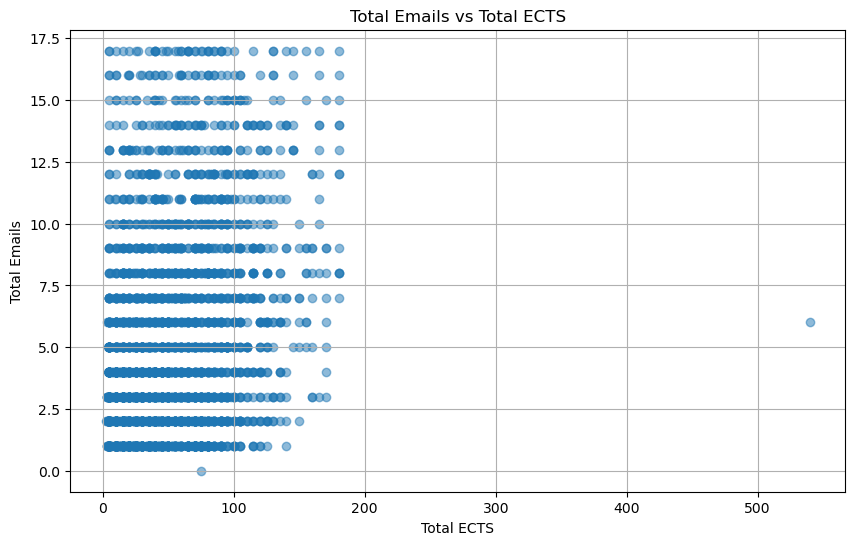

In [12]:
import matplotlib.pyplot as plt
data=filtered_data_no_outliers
# Filter out rows where total_emails or total_ects are NaN
filtered_data = data.dropna(subset=['total_emails', 'total_ects'])

# Plotting total_emails vs total_ects
plt.figure(figsize=(10,6))
plt.scatter( filtered_data['total_ects'], filtered_data['total_emails'],alpha=0.5)
plt.title('Total Emails vs Total ECTS')
plt.ylabel('Total Emails')
plt.xlabel('Total ECTS')
plt.grid(True)
plt.show()


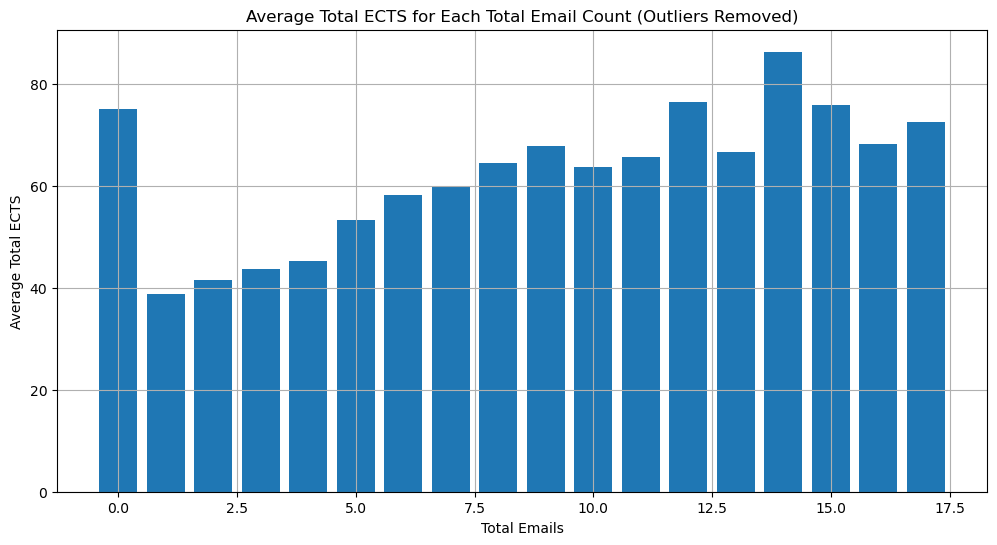

In [13]:

# Recalculate the average values for the filtered data
avg_ects_per_email_no_outliers = filtered_data_no_outliers.groupby('total_emails')['total_ects'].mean().reset_index()

# Plotting the data without outliers
plt.figure(figsize=(12, 6))
plt.bar(avg_ects_per_email_no_outliers['total_emails'], avg_ects_per_email_no_outliers['total_ects'])
plt.title('Average Total ECTS for Each Total Email Count (Outliers Removed)')
plt.xlabel('Total Emails')
plt.ylabel('Average Total ECTS')
plt.grid(True)
plt.show()


In [14]:
import datetime

# Function to count emails after cancellation
def count_emails_after_cancellation(email_dates, cancellation_date):
    if not isinstance(email_dates, list) or pd.isna(cancellation_date):
        return 0
    cancellation_date = pd.to_datetime(cancellation_date, dayfirst=True)
    email_dates = [pd.to_datetime(date) for date in email_dates]
    return sum(date > cancellation_date for date in email_dates)

# Apply the function to each row
data['emails_after_cancellation'] = data.apply(lambda row: count_emails_after_cancellation(row['emaildatum'], row['Kuendigungsdatum']), axis=1)

# Display the first few rows of the dataframe to verify the result
data[['Kuendigungsdatum', 'emaildatum', 'emails_after_cancellation']].head()


,Kuendigungsdatum,emaildatum,emails_after_cancellation
2,07.04.2021,"[datetime.date(2019, 7, 26), datetime.date(201...",0
5,06.04.2021,"[datetime.date(2021, 3, 7)]",0
6,06.04.2021,"[datetime.date(2020, 3, 28), datetime.date(202...",0
7,05.04.2021,"[datetime.date(2019, 11, 19), datetime.date(20...",0
8,05.04.2021,"[datetime.date(2019, 7, 11), datetime.date(201...",0


In [17]:
# Re-evaluating the calculation considering the correct interpretation of the columns
# 'Kuendigungsdatum' indicates the cancellation date and 'emaildatum' contains dates of emails sent

def count_emails_after_cancellation_v2(email_dates, cancellation_date):
    if not isinstance(email_dates, list) or pd.isna(cancellation_date):
        return 0
    cancellation_date = pd.to_datetime(cancellation_date, format="%d.%m.%Y")
    email_dates = [pd.to_datetime(str(date), format='%Y-%m-%d') for date in email_dates]
    return sum(date > cancellation_date for date in email_dates)

# Apply the function to each row
data['emails_after_cancellation_v2'] = data.apply(
    lambda row: count_emails_after_cancellation_v2(row['emaildatum'], row['Kuendigungsdatum']), axis=1
)

# Count the number of students who have sent emails after the cancellation date
count_students_emailed_after_cancellation_v2 = data[data['emails_after_cancellation_v2'] > 0].shape[0]
count_students_emailed_after_cancellation_v2



0

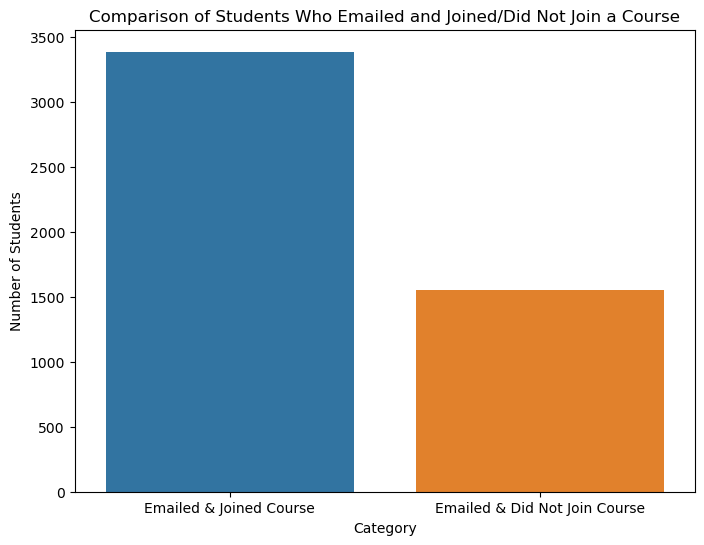

In [23]:
# Classifying and counting students
# Students who joined a course will have a 'StudiumID'
# We also check if they have sent at least one email ('total_emails' > 0)
data=df
students_not_emailed_and_joined_course = data[(data['StudiumID'].notna()) & (data['total_emails'] < 1)].shape[0]
students_emailed_and_joined_course = data[(data['StudiumID'].notna()) & (data['total_emails'] > 0)].shape[0]
students_emailed_but_did_not_join_course = data[(data['StudiumID'].isna()) & (data['total_emails'] > 0)].shape[0]

students_not_emailed_and_joined_course,students_emailed_and_joined_course, students_emailed_but_did_not_join_course


# Preparing data for the seaborn plot
counts = [students_emailed_and_joined_course, students_emailed_but_did_not_join_course]
categories = ['Emailed & Joined Course', 'Emailed & Did Not Join Course']

plot_data = pd.DataFrame({'Category': categories, 'Count': counts})

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=plot_data)
plt.title('Comparison of Students Who Emailed and Joined/Did Not Join a Course')
plt.ylabel('Number of Students')
plt.xlabel('Category')
plt.show()


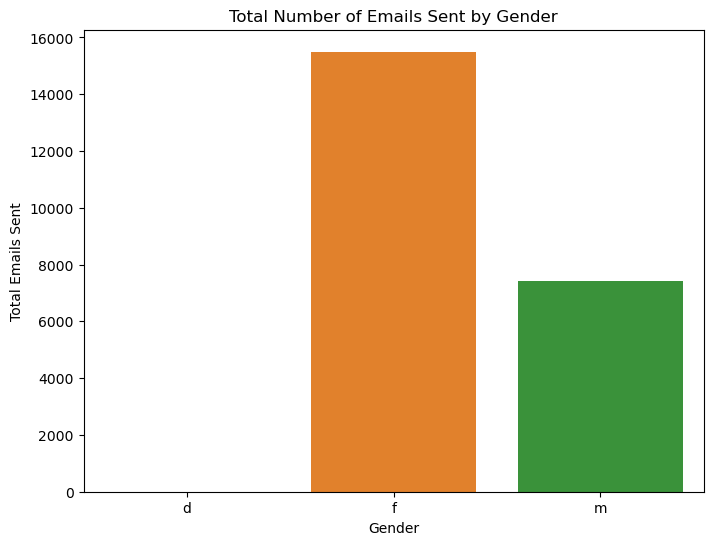

In [26]:
# To plot the number of emails sent by gender, we'll group the data by 'Geschlecht' (gender) and sum up the 'total_emails'.

# Grouping by gender and calculating the total number of emails sent for each gender
emails_by_gender = data.groupby('Geschlecht')['total_emails'].sum()

# Resetting index for plotting purposes
emails_by_gender = emails_by_gender.reset_index()

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Geschlecht', y='total_emails', data=emails_by_gender)
plt.title('Total Number of Emails Sent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Emails Sent')
plt.show()


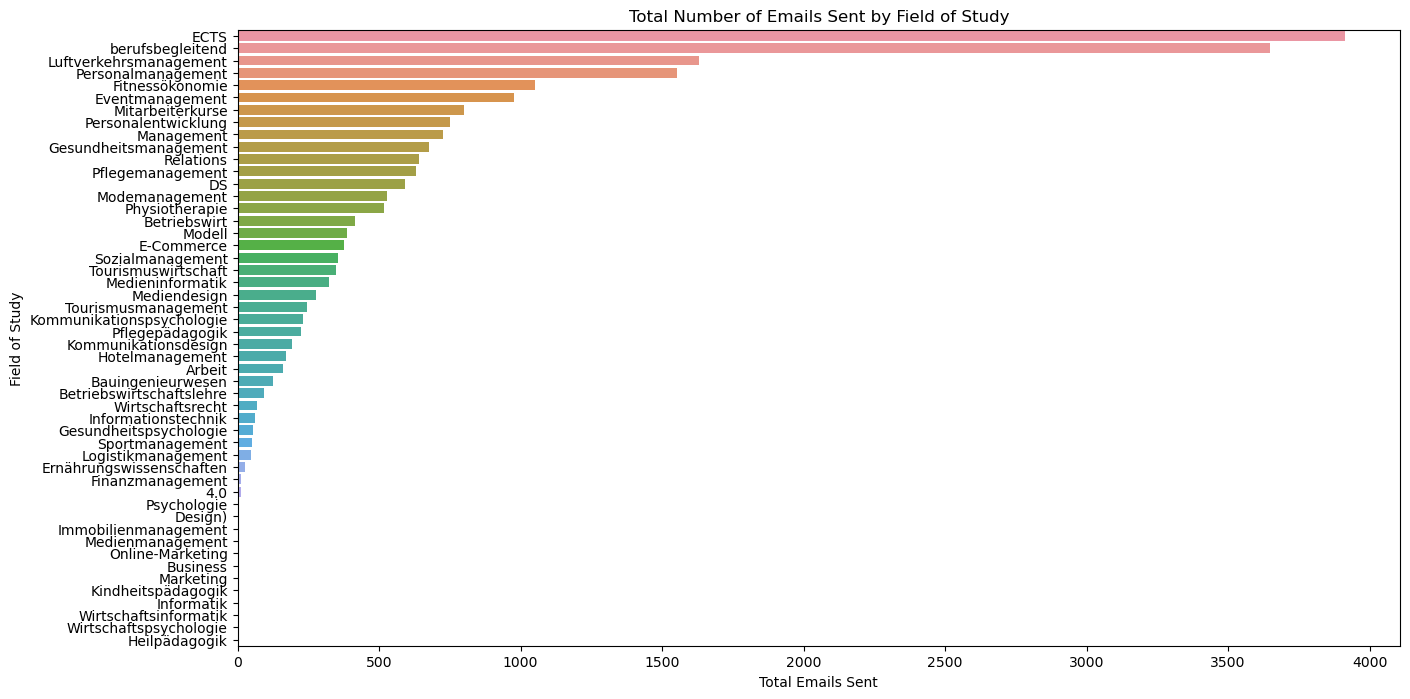

In [29]:
# To plot the number of emails sent by different fields of study, we'll use the 'Field' column.

# Grouping by field and calculating the total number of emails sent for each field
emails_by_field = data.groupby('Field')['total_emails'].sum().reset_index()

# Sorting the data for better visualization
emails_by_field = emails_by_field.sort_values(by='total_emails', ascending=False)

# Plotting using seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='total_emails', y='Field', data=emails_by_field)
plt.title('Total Number of Emails Sent by Field of Study')
plt.xlabel('Total Emails Sent')
plt.ylabel('Field of Study')
plt.show()


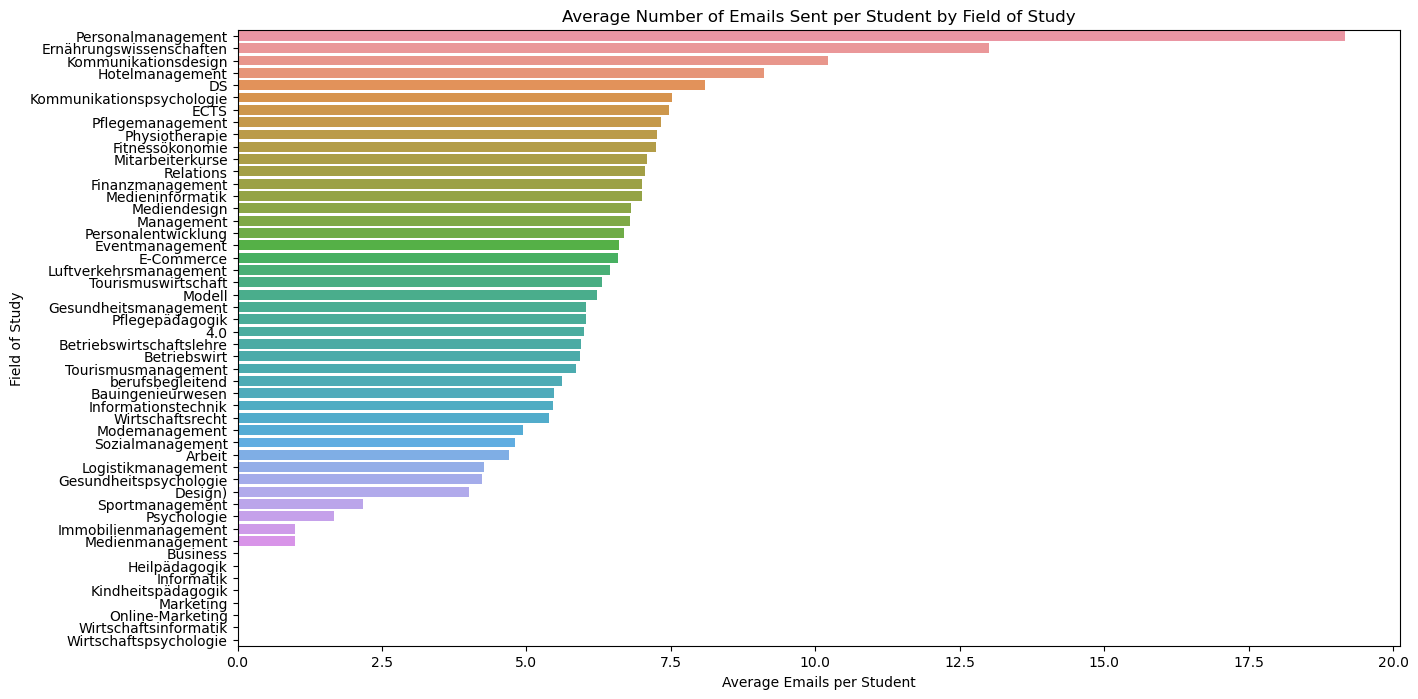

In [30]:
# To calculate the average number of emails sent per student in each field,
# we first need to count the number of students who sent emails in each field.

# Counting the number of students who sent emails in each field
students_sending_emails_by_field = data[data['total_emails'] > 0].groupby('Field').size()

# Calculating the average number of emails sent per student in each field
avg_emails_by_field = (emails_by_field.set_index('Field')['total_emails'] / students_sending_emails_by_field).reset_index()
avg_emails_by_field.columns = ['Field', 'Average Emails per Student']

# Sorting the data for better visualization
avg_emails_by_field = avg_emails_by_field.sort_values(by='Average Emails per Student', ascending=False)

# Plotting using seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='Average Emails per Student', y='Field', data=avg_emails_by_field)
plt.title('Average Number of Emails Sent per Student by Field of Study')
plt.xlabel('Average Emails per Student')
plt.ylabel('Field of Study')
plt.show()


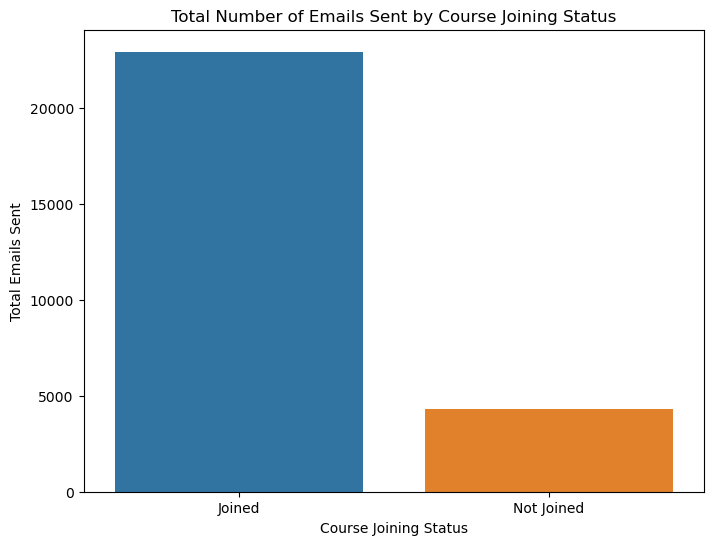

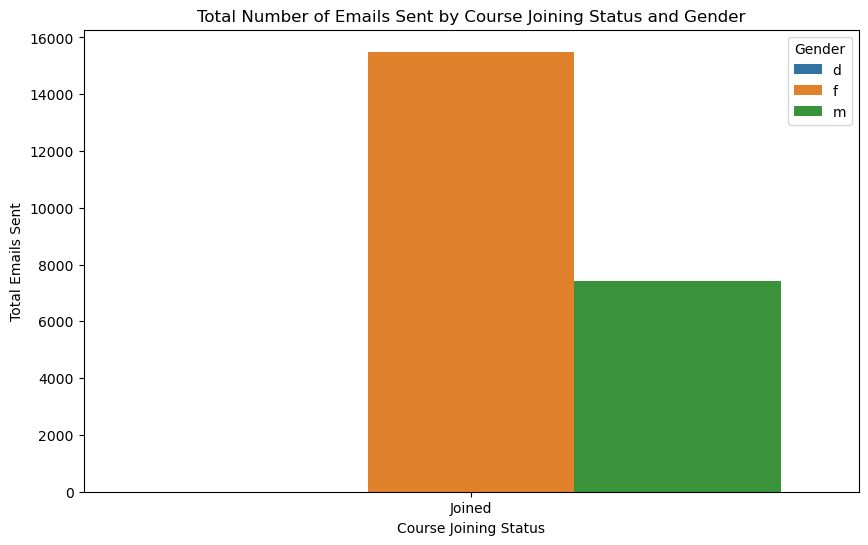

In [28]:
# To plot the number of emails sent by those who have joined vs. not joined a course, 
# we'll classify the students based on whether they have a 'StudiumID' (indicating they've joined a course).

# Adding a new column to classify students who joined vs. did not join a course
data['Course_Status'] = data['StudiumID'].apply(lambda x: 'Joined' if pd.notna(x) else 'Not Joined')

# Grouping by course status and calculating the total number of emails sent for each group
emails_by_course_status = data.groupby('Course_Status')['total_emails'].sum()

# Resetting index for plotting purposes
emails_by_course_status = emails_by_course_status.reset_index()

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Course_Status', y='total_emails', data=emails_by_course_status)
plt.title('Total Number of Emails Sent by Course Joining Status')
plt.xlabel('Course Joining Status')
plt.ylabel('Total Emails Sent')
plt.show()


# To subdivide the number of emails sent by course joining status and gender,
# we need to group the data by both 'Course_Status' and 'Geschlecht' (gender).

# Grouping by course status and gender, and calculating the total number of emails sent for each group
emails_by_status_and_gender = data.groupby(['Course_Status', 'Geschlecht'])['total_emails'].sum().reset_index()

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Course_Status', y='total_emails', hue='Geschlecht', data=emails_by_status_and_gender)
plt.title('Total Number of Emails Sent by Course Joining Status and Gender')
plt.xlabel('Course Joining Status')
plt.ylabel('Total Emails Sent')
plt.legend(title='Gender')
plt.show()



,studentid,emaildatum,anzahl_emails
0,31235835,25.03.2020,2
1,31240521,12.12.2019,2
2,31246749,03.04.2020,6
3,31230093,03.04.2020,6
4,31260822,19.04.2020,3
...,...,...,...
22377,30586278,09.04.2021,1
22378,31259100,09.04.2021,1
22379,31261485,11.03.2021,1
22380,28125939,11.03.2021,1


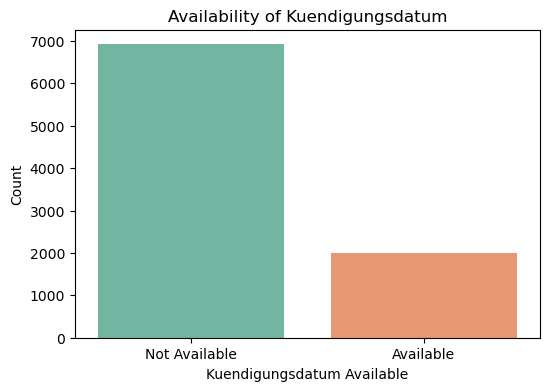

In [39]:
# Checking the availability of 'Kuendigungsdatum' in the original dataset
data['Kuendigungsdatum_available'] = data['Kuendigungsdatum'].notna()

# Plotting using seaborn
plt.figure(figsize=(6, 4))
sns.countplot(x='Kuendigungsdatum_available', data=data, palette='Set2')
plt.title('Availability of Kuendigungsdatum')
plt.xlabel('Kuendigungsdatum Available')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Available', 'Available'])
plt.show()


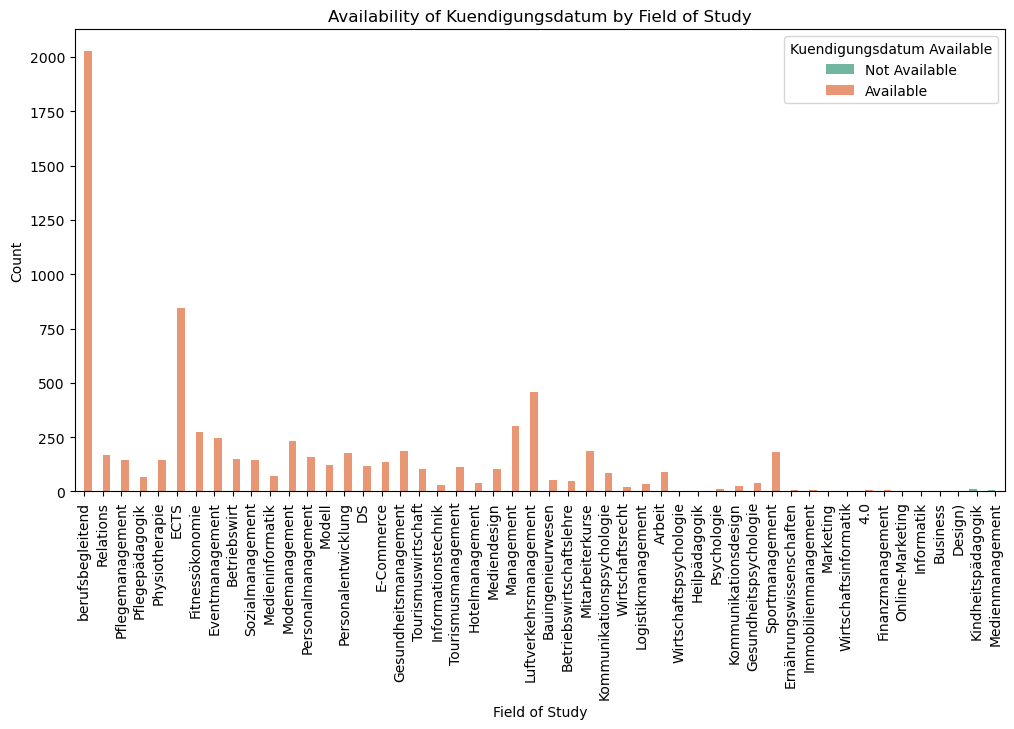

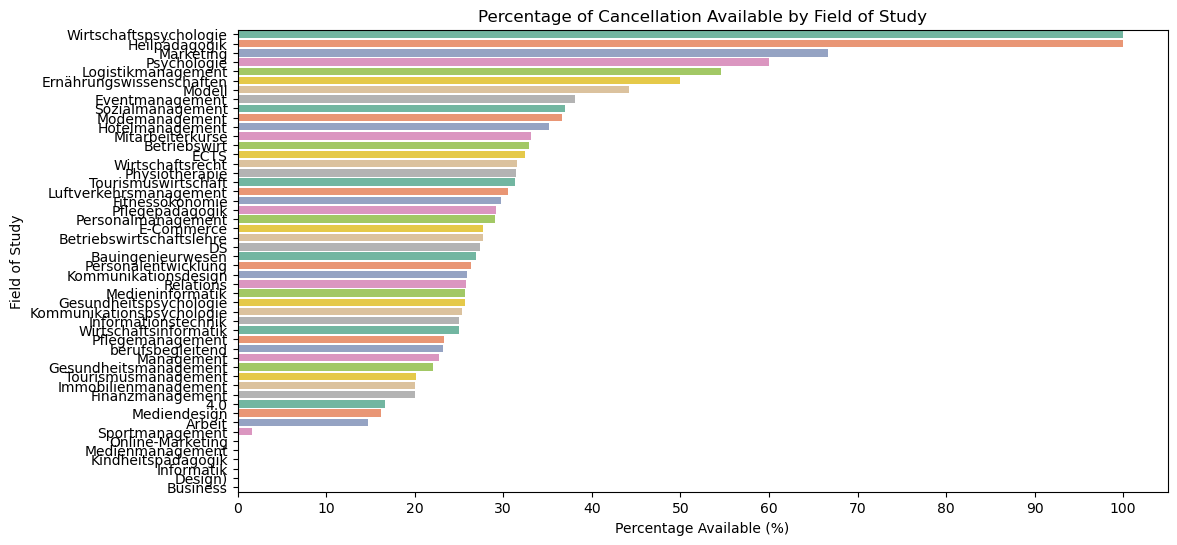

In [42]:
# Renaming the column and replotting
data = data.rename(columns={'Kuendigungsdatum_available': 'Cancellation_available'})

# Calculating the percentage of available 'Kuendigungsdatum' by field of study
percentage_available_by_field = data.groupby('Field')['Cancellation_available'].mean() * 100

# Sorting the data for better visualization
percentage_available_by_field = percentage_available_by_field.reset_index().sort_values(by='Cancellation_available', ascending=False)

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Cancellation_available', y='Field', data=percentage_available_by_field, palette='Set2')
plt.title('Percentage of Cancellation Available by Field of Study')
plt.xlabel('Percentage Available (%)')
plt.ylabel('Field of Study')
plt.xticks(range(0, 101, 10))
plt.show()


In [49]:
data['Cancellation_available_by_gender'] = data.groupby('Geschlecht')['Kuendigungsdatum'].transform(lambda x: x.notna().any())
data['Cancellation_available_by_gender'] = data['Cancellation_available_by_gender'].fillna(False)



# Checking the availability of 'Kuendigungsdatum' for students who have not canceled
data['Cancellation_available_for_not_canceled'] = data[data['Kuendigungsdatum'].isna()]['Kuendigungsdatum'].notna()


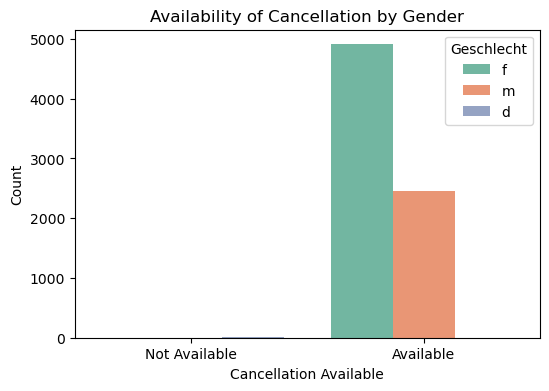

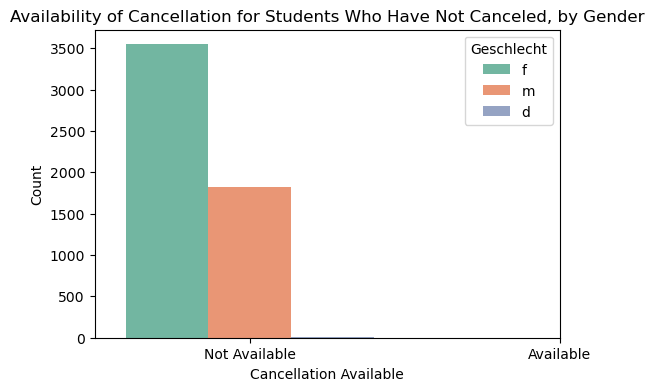

In [50]:

# Plotting using seaborn
plt.figure(figsize=(6, 4))
sns.countplot(x='Cancellation_available_by_gender', hue='Geschlecht', data=data, palette='Set2')
plt.title('Availability of Cancellation by Gender')
plt.xlabel('Cancellation Available')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Available', 'Available'])
plt.show()


# Replotting using seaborn
plt.figure(figsize=(6, 4))
sns.countplot(x='Cancellation_available_for_not_canceled', hue='Geschlecht', data=data, palette='Set2')
plt.title('Availability of Cancellation for Students Who Have Not Canceled, by Gender')
plt.xlabel('Cancellation Available')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Available', 'Available'])
plt.show()
